In [1]:
import peralyzer

In [ ]:
csvPath = "CSVPATH"
peralyzer.init()

Analyzer initialized!


In [3]:
peralyzer.readCsv(csvPath)

Reading file: PER CSV Modbus Log 05/25/23 09:39:05 PM



Processing CSV: 17791117lines [00:27, 649732.55lines/s]


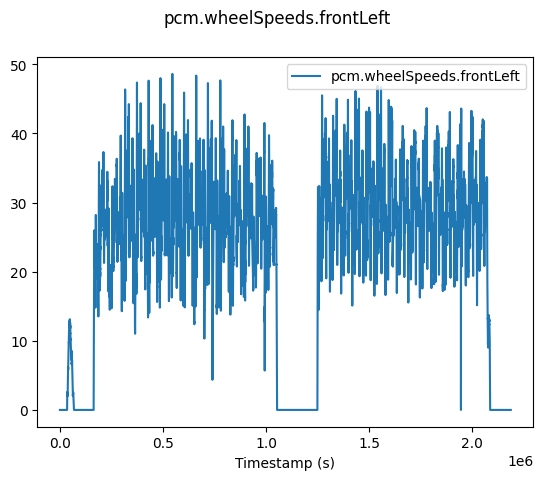

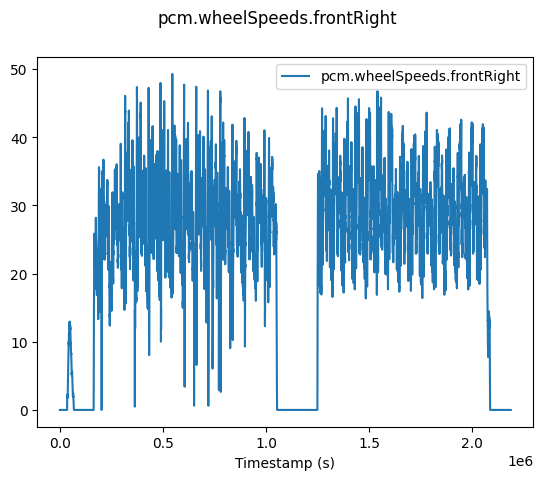

In [4]:
variables = [
    "pcm.wheelSpeeds.frontLeft",
    "pcm.wheelSpeeds.frontRight"
]

peralyzer.plot(variables, False)